# PROBLEM STATEMENTS

## Problem Statement 1:
Can we classify customer tickets into the correct Topic Group using ML?
This helps automate routing and reduce support workload.

## Problem Statement 2:
Which ML model performs best on text classification for this dataset?
This supports the selection of the best model for deployment.

## Problem Statement 3:
What insights can management gain from the distribution of topics and model performance?
This supports managerial decision making for staffing and process improvement.


# LOADING DATASET AND LIBRARIES

In [ ]:
# IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# LOADING DATASET

mlm_group8 = pd.read_csv("/content/all_tickets_processed_improved_v3.csv")
print(mlm_group8.head())
print(mlm_group8.info())
print(mlm_group8.describe())

                                            Document    Topic_group
0  connection with icon icon dear please setup ic...       Hardware
1  work experience user work experience user hi w...         Access
2  requesting for meeting requesting meeting hi p...       Hardware
3  reset passwords for external accounts re expir...         Access
4  mail verification warning hi has got attached ...  Miscellaneous
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47837 entries, 0 to 47836
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Document     47837 non-null  object
 1   Topic_group  47837 non-null  object
dtypes: object(2)
memory usage: 747.6+ KB
None
                                                 Document Topic_group
count                                               47837       47837
unique                                              47837           8
top     running out on extensions hello please be advi...    Ha

In [ ]:
# BASIC DATA CHECKS
print("\nMissing Values:\n", mlm_group8.isnull().sum())


Missing Values:
 Document       0
Topic_group    0
dtype: int64


# TOPIC DISTRIBUTION CHART

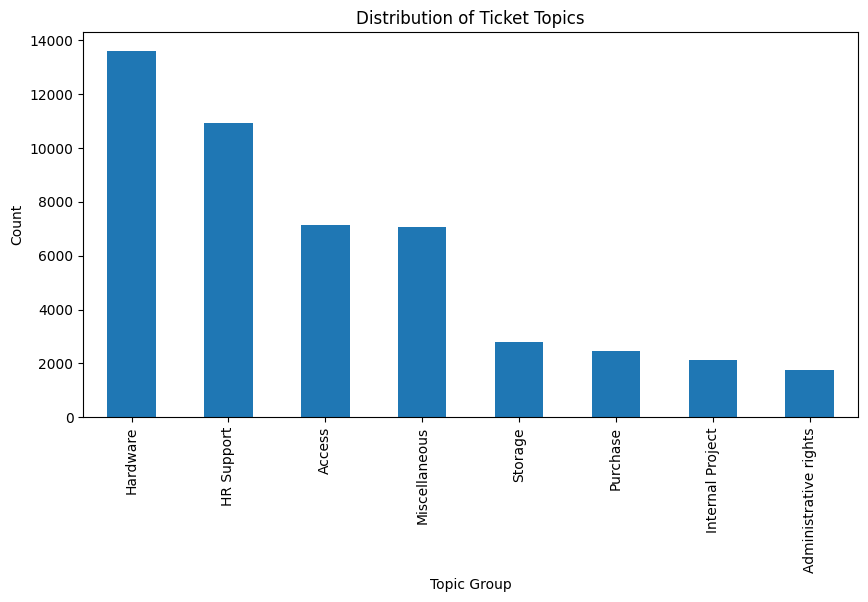

In [ ]:
# EDA – Topic distribution
plt.figure(figsize=(10,5))
mlm_group8["Topic_group"].value_counts().plot(kind="bar")
plt.title("Distribution of Ticket Topics")
plt.xlabel("Topic Group")
plt.ylabel("Count")
plt.show()

# DATA PREPROCESSING AND PREPING

In [ ]:
# Basic cleaning

mlm_group8.dropna(subset=["Document", "Topic_group"], inplace=True)

X = mlm_group8["Document"]
y = mlm_group8["Topic_group"]

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Vectorization using TF-IDF

vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF transformation complete. Shape:", X_train_tfidf.shape)

TF-IDF transformation complete. Shape: (38269, 3000)


# MODEL 1: Multinomial Naive Bayes

## (Baseline Model)
## Rationale:
*   Fast and works well for text classification
*   Good as a baseline benchmark

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_pred = nb.predict(X_test_tfidf)

print("\n======== Naive Bayes Results ========")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


======== Naive Bayes Results ========
Accuracy: 0.775188127090301
                       precision    recall  f1-score   support

               Access       0.84      0.80      0.82      1425
Administrative rights       0.94      0.33      0.49       352
           HR Support       0.78      0.79      0.78      2183
             Hardware       0.69      0.87      0.77      2724
     Internal Project       0.94      0.59      0.72       424
        Miscellaneous       0.76      0.71      0.73      1412
             Purchase       0.97      0.84      0.90       493
              Storage       0.93      0.72      0.82       555

             accuracy                           0.78      9568
            macro avg       0.86      0.71      0.75      9568
         weighted avg       0.79      0.78      0.77      9568



# MODEL 2: Logistic Regression

## Rationale:

*   Handles sparse text data well
*   Often outperforms simple classifiers

In [ ]:
log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X_train_tfidf, y_train)
lr_pred = log_reg.predict(X_test_tfidf)

print("\n======== Logistic Regression Results ========")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


======== Logistic Regression Results ========
Accuracy: 0.8494983277591973
                       precision    recall  f1-score   support

               Access       0.91      0.87      0.89      1425
Administrative rights       0.88      0.65      0.75       352
           HR Support       0.86      0.85      0.85      2183
             Hardware       0.79      0.88      0.83      2724
     Internal Project       0.91      0.81      0.85       424
        Miscellaneous       0.82      0.81      0.82      1412
             Purchase       0.98      0.88      0.93       493
              Storage       0.94      0.85      0.89       555

             accuracy                           0.85      9568
            macro avg       0.89      0.83      0.85      9568
         weighted avg       0.85      0.85      0.85      9568



# MODEL 3: Linear SVM (LinearSVC)

## Rationale:


*   Best performer for many text classification tasks
*   Maximizes margin and handles high-dimensional TF-IDF features

In [ ]:
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
svm_pred = svm.predict(X_test_tfidf)

print("\n======== Linear SVM Results ========")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


======== Linear SVM Results ========
Accuracy: 0.8496028428093646
                       precision    recall  f1-score   support

               Access       0.90      0.89      0.89      1425
Administrative rights       0.83      0.72      0.77       352
           HR Support       0.85      0.85      0.85      2183
             Hardware       0.81      0.85      0.83      2724
     Internal Project       0.88      0.86      0.87       424
        Miscellaneous       0.81      0.82      0.82      1412
             Purchase       0.95      0.87      0.91       493
              Storage       0.92      0.88      0.90       555

             accuracy                           0.85      9568
            macro avg       0.87      0.84      0.86      9568
         weighted avg       0.85      0.85      0.85      9568



# CONFUSION MATRICES

## Confusion Matrix for Naive Bayes

<Figure size 1000x800 with 0 Axes>

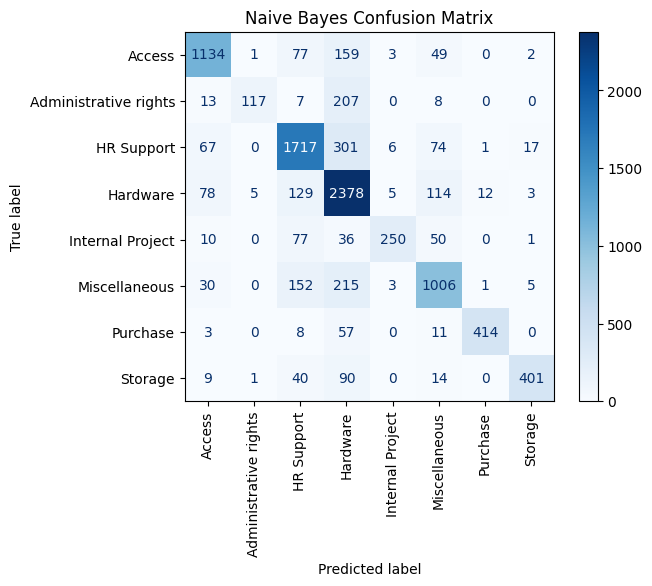

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for Naive Bayes
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(nb, X_test_tfidf, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

## Confusion Matrix for Logistic Regression

<Figure size 1000x800 with 0 Axes>

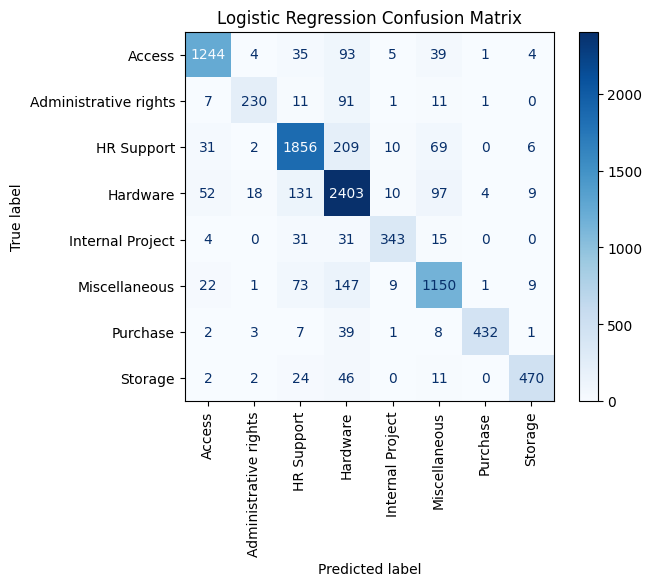

In [ ]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_tfidf, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

## Confusion Matrix for Linear SVM

<Figure size 1000x800 with 0 Axes>

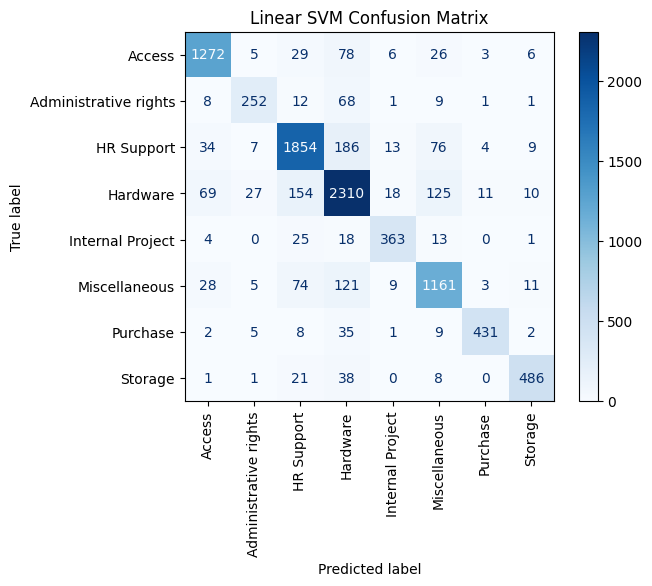

In [ ]:
# Confusion Matrix for Linear SVM
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(svm, X_test_tfidf, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Linear SVM Confusion Matrix')
plt.show()

# COMPARING ACCURACIES

In [ ]:
print("\nModel Comparison:")
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

print("\nAnalysis complete. Review the managerial insights section for recommendations.")



Model Comparison:
Naive Bayes Accuracy: 0.775188127090301
Logistic Regression Accuracy: 0.8494983277591973
SVM Accuracy: 0.8496028428093646

Analysis complete. Review the managerial insights section for recommendations.


# MANAGERIAL INSIGHTS

1. **Ticket Volume Concentration:**
   The topic distribution chart shows where customer issues cluster.
   Management can allocate support staff more efficiently to high-volume categories.

2. **Automation Potential:**
   If SVM achieves the highest accuracy, it indicates high potential for automation of ticket routing.
   This reduces handling time and improves SLAs.

3. **Quality of Customer Communication:**
   Misclassified topics reveal confusing or ambiguous ticket descriptions.
   Training customer service agents to record clearer descriptions can improve classification.

4. **Resource Planning:**
   Frequent categories suggest areas where product improvements or FAQ enhancements can reduce ticket load.

5. **Deployment Recommendation:**
   Based on model comparison, the best-performing model should be selected for real-time ticket routing.